In [ ]:
# Problem Statement:
# You are the Data Scientist at a telecom company “Neo” whose customers are churning out to
# its competitors. You have to analyse the data of your company and find insights and stop your
# customers from churning out to other telecom companies.

In [96]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
# Loading csv file
Churn = pd.read_csv("customer_churn.csv")

In [98]:
# find column dtype using info() function
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
# Numerical data summary using describe() function
Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [100]:
# Data Manipulation
# Extract first 5 record using head() function
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# Extract the 5th column & store it in ‘customer_5’
customer_5 = Churn.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [102]:
# Extract the 15th column & store it in ‘customer_15’
customer_15 = Churn.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [103]:
# Extract all the male senior citizens whose Payment Method is Electronic check &
# store the result in ‘senior_male_electronic’

senior_male_electronic = Churn[(Churn["gender"] == "Male") & (Churn['SeniorCitizen']==1) & (Churn["PaymentMethod"]=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [104]:
# Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the 
# result in ‘customer_total_tenure’
customer_total_tenure = Churn[(Churn["tenure"]>70) | (Churn["MonthlyCharges"]>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [105]:
# Extract all the customers whose Contract is of two years, payment method is Mailed
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes = Churn[(Churn["Contract"]=="Two year") & (Churn["PaymentMethod"]=="Mailed check") & (Churn["Churn"]=="Yes")]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [106]:
# Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’

customer_333 = Churn.sample(n=333)
customer_333.shape

(333, 21)

In [107]:
# Get the count of different levels from the ‘Churn’ column
Churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of Internet Service')

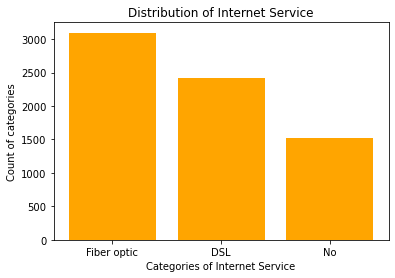

In [108]:
# Data Visualization
# Build a bar-plot for the ’InternetService’ column:
# i. Set x-axis label to ‘Categories of Internet Service’
# ii. Set y-axis label to ‘Count of Categories’
# iii. Set the title of plot to be ‘Distribution of Internet Service’
# iv. Set the color of the bars to be ‘orange’

plt.bar(Churn['InternetService'].value_counts().keys(),Churn['InternetService'].value_counts(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

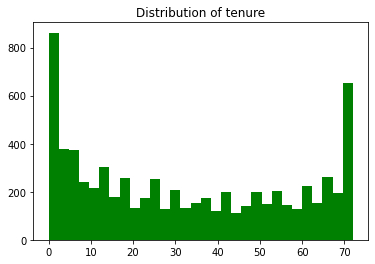

In [109]:
# Build a histogram for the ‘tenure’ column:
# i. Set the number of bins to be 30
# ii. Set the color of the bins to be ‘green’
# iii. Assign the title ‘Distribution of tenure’

plt.hist(Churn["tenure"],color="green", bins = 30)
plt.title("Distribution of tenure")

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

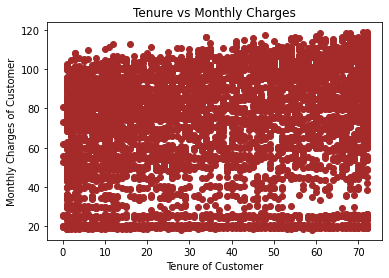

In [110]:
# c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
# the y-axis & ‘tenure’ to the ‘x-axis’:
# i. Assign the points a color of ‘brown’
# ii. Set the x-axis label to ‘Tenure of customer’
# iii. Set the y-axis label to ‘Monthly Charges of customer’
# iv. Set the title to ‘Tenure vs Monthly Charges’

plt.scatter(Churn["tenure"],Churn["MonthlyCharges"], color = "brown")
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')

[Text(0.5, 0, 'Contract'), Text(0.5, 1.0, 'Contract vs  Tenure')]

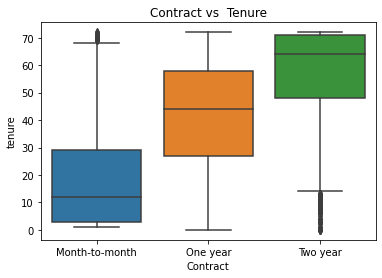

In [111]:
# d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.
sns.boxplot(data = Churn, x = "Contract", y = "tenure").set(xlabel = "Contract" ,title = "Contract vs  Tenure")

In [118]:
# Machine Learning
# Linear Regresssion
# a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
# i. Divide the dataset into train and test sets in 70:30 ratio.
# ii. Build the model on train set and predict the values on test set
# iii. After predicting the values, find the root mean square error
# iv. Find out the error in prediction & store the result in ‘error’
# v. Find the root mean square error

from sklearn.model_selection import train_test_split
x = Churn[["tenure"]]
y = Churn[["MonthlyCharges"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#building the model
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train,y_train)

#predicting the values

y_pred = simpleLinearRegression.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
rsme = np.sqrt(mse)
rsme

28.597976225102656

In [125]:
# D) Logistic Regression:
# a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
# independent variable is ‘MonthlyCharges’
# i. Divide the dataset in 65:35 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score

from sklearn.model_selection import train_test_split
x = Churn[["MonthlyCharges"]]
y = Churn[["Churn"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)
from sklearn.linear_model import LogisticRegression
simpleLogisticRegression = LogisticRegression()
simpleLogisticRegression.fit(x_train,y_train)

y_pred = simpleLogisticRegression.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7356042173560422

In [122]:
# b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
# independent variables are ‘tenure’ & ‘MonthlyCharges’
# i. Divide the dataset in 80:20 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score

x=Churn[['MonthlyCharges','tenure']]
y=Churn['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred = logmodel.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score 
print(confusion_matrix(y_test, y_pred))  
print(accuracy_score(y_test,y_pred))

[[3711  423]
 [ 806  695]]
0.7818988464951198


In [126]:
# E) Decision Tree:
# a. Build a decision tree model where dependent variable is ‘Churn’ & independent
# variable is ‘tenure’
# i. Divide the dataset in 80:20 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy

x=Churn[['tenure']]
y=Churn['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[952 251]
 [ 96 110]]
0.7537260468417317


In [128]:
# F) Random Forest:
# a. Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy

x = Churn[["tenure","MonthlyCharges"]]
y = Churn["Churn"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1302  224]
 [ 341  246]]
0.7326076668244202
